# 1.0. Initiation: Import smPy

In [1]:
import sys

sys.path.append('../')
from smpy import *

# 1.1. Importing a PMA, Generating an mp4, and Creating an Average Frame
### 1.1i. Importing a PMA and Generating an mp4

In [2]:
file_path = "../pma files/hel1.pma" 

In [3]:
generate_video(file_path, fps=5)

Image Size: 512 x 512
Video sucessfully generated and saved: hel1_Video/hel1.mp4
Frame Count: 431


### 1.1ii. Creating an Average Frame

Image Size: 512 x 512
Sucessfully generated average frame


Text(0.5, 1.0, 'Average Frame Image')

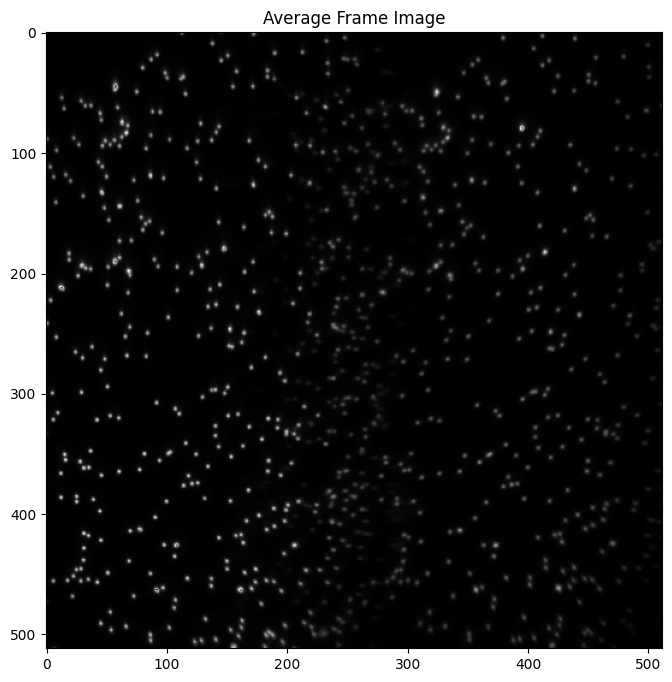

In [4]:
avg_frame_data = avg_frame_arr(file_path)
image_path = "hel1_Avg/hel1_Avg_Frame.png"
# Image.fromarray(avg_frame_data).save(image_path)
image = io.imread(image_path, as_gray=True)
plt.figure(figsize=(8, 8))
plt.imshow(avg_frame_data, cmap='gray')
plt.title("Average Frame Image")

### 1.1iii. Saving Average Frames

In [5]:
CH1_img_path = "hel1_Avg/hel1_CH1_Avg_Frame.png"
CH2_img_path = "hel1_Avg/hel1_CH2_Avg_Frame.png"

CH1_data = avg_frame_data[:,:256]
CH2_data = avg_frame_data[:,256:]

# Image.fromarray(CH1_data).save(CH1_img_path)
# Image.fromarray(CH2_data).save(CH2_img_path)

image_CH1 = io.imread(CH1_img_path, as_gray=True)  
image_CH2 = io.imread(CH2_img_path, as_gray=True)

# 1.2. + 1.3.: Detecting All Bright Spots Filtering Peaks
### The find_good_peaks() function contains the find_peaks() function detaile in the review.

In [6]:
good_peaks_1, _ = find_good_peaks(CH1_img_path)
good_peaks_2_CH1, _ = find_good_peaks(CH2_img_path)

good_peaks_2_CH2 = shift_peaks(good_peaks_2_CH1, [0, 256])


# 1.4. Mapping
### 1.4i. Linear Shift

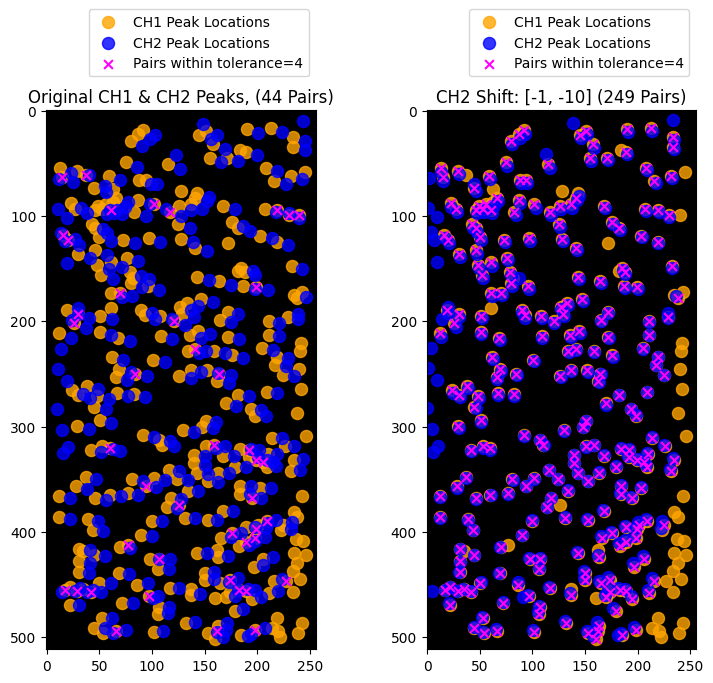

In [7]:
shift = [-1,-10]
tolerance = 4
good_peaks_2_shift = shift_peaks(good_peaks_2_CH1, shift=shift)

found_pairs_noshift_count, found_pairs_noshift_CH1, found_pairs_noshift_CH2 = find_pairs(good_peaks_1, good_peaks_2_CH1, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count, found_pairs_shift_CH1, found_pairs_shift_CH2 = find_pairs(good_peaks_1, good_peaks_2_shift, tolerance=tolerance, Channel_count=1)

fig, axes = plt.subplots(1,2, figsize=(9, 7))

axes[0].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[0].scatter(good_peaks_1[:,1], good_peaks_1[:,0], s=300, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2_CH1[:,1], good_peaks_2_CH1[:,0], s=300, marker=".", alpha=0.8, color="b", label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift_CH1[:,1], found_pairs_noshift_CH1[:,0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original CH1 & CH2 Peaks, ({found_pairs_noshift_count} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[1].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[1].scatter(good_peaks_1[:,1], good_peaks_1[:,0], s=300, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[1].scatter(good_peaks_2_shift[:,1], good_peaks_2_shift[:,0], s=300, marker=".", alpha=0.8, color="b", label='CH2 Peak Locations')
axes[1].scatter(found_pairs_shift_CH1[:,1], found_pairs_shift_CH1[:,0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[1].set_title(f"CH2 Shift: {shift} ({found_pairs_shift_count} Pairs)")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

plt.show()


### 1.4ii. Manual Selection
This should be done by executing the Manual_Select_TwoColour.py file within the same directory as this file.

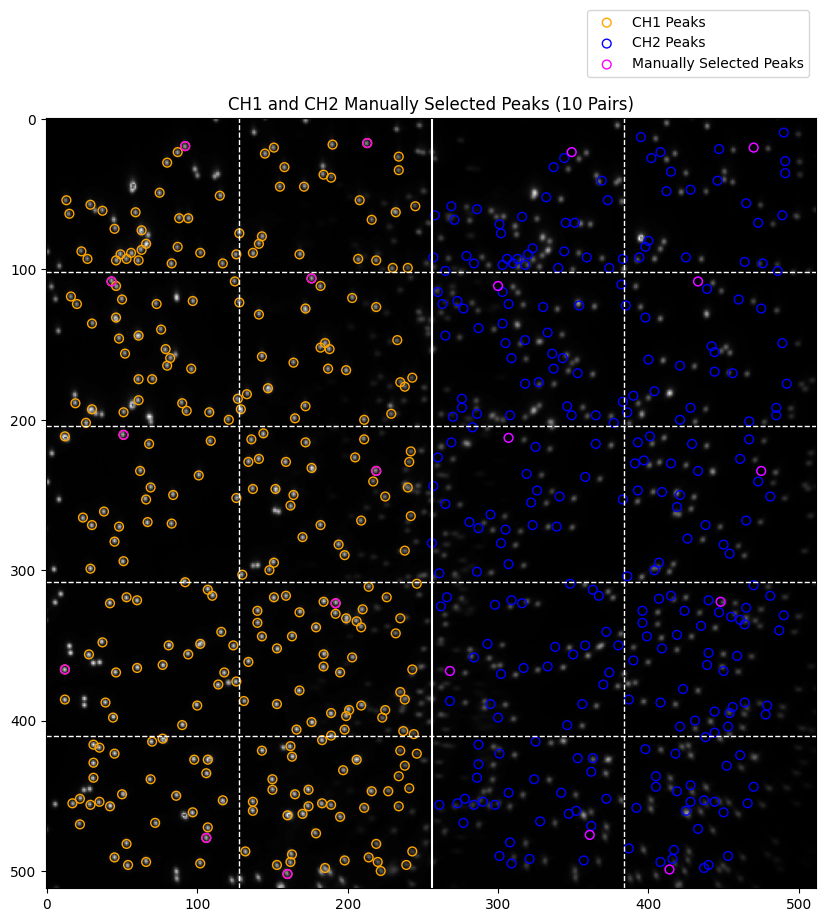

In [8]:
CH1_arr = np.array([[18,92], [16,213], [108,43], [106,176], [210,51], [234, 219], [366,12], [322,192], [478,106], [502,160]])
CH2_arr = np.array([[22,349], [19,470], [111,300], [108,433], [212,307], [234, 475], [367,268], [321,448], [476,361], [499,414]])

good_peaks_2_CH2_shift = shift_peaks(good_peaks_2_CH2, shift=[-1,-10])
plt.figure(figsize=(10, 10))
plt.title("CH1 and CH2 Manually Selected Peaks (10 Pairs)")
plt.imshow(image, cmap='gray')

plt.axhline(y=102, color="w", linestyle='--', linewidth=1)
plt.axhline(y=204, color="w", linestyle='--', linewidth=1)
plt.axhline(y=308, color="w", linestyle='--', linewidth=1)
plt.axhline(y=410, color="w", linestyle='--', linewidth=1)

plt.axvline(x=128, color="w", linestyle='--', linewidth=1)
plt.axvline(x=384, color="w", linestyle='--', linewidth=1)

plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)

plt.scatter(good_peaks_1[:,1], good_peaks_1[:,0], s=40, facecolor='none', edgecolor='orange', label='CH1 Peaks')
plt.scatter(good_peaks_2_CH2_shift[:,1], good_peaks_2_CH2_shift[:,0], s=40, facecolor='none', edgecolor='b', label='CH2 Peaks')
plt.scatter(CH1_arr[:,1], CH1_arr[:,0], s=40, facecolor='none', edgecolor='magenta', label='Manually Selected Peaks')
plt.scatter(CH2_arr[:,1], CH2_arr[:,0], s=40, facecolor='none', edgecolor='magenta')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.15))
plt.show()

### 1.4iii. Polynomial Mapping

In [9]:
params_x, params_y = find_polyfit_params(CH1_arr, CH2_arr, degree=3)

print("X-Mapping Parameters:", params_x)
print("Y-Mapping Parameters:", params_y)

mapped_peaks = apply_polyfit_params(good_peaks_1, params_x, params_y).astype(np.uint16)
poly_pair_count, poly_pair_CH1, poly_pair_CH2 = find_pairs(good_peaks_1, mapped_peaks, tolerance=4, shift=[-1,-10])
print("Number of Pairs Found:", poly_pair_count)

X-Mapping Parameters: [ 1.40249323e-06 -4.17604040e-04  1.02809700e+00  2.55896256e+02]
Y-Mapping Parameters: [-6.43405067e-08  4.42739164e-05  9.80836912e-01  3.90618214e+00]
Number of Pairs Found: 269


### 1.4.iv. Displaying All Found Pairs (From Polynomial Mapping)

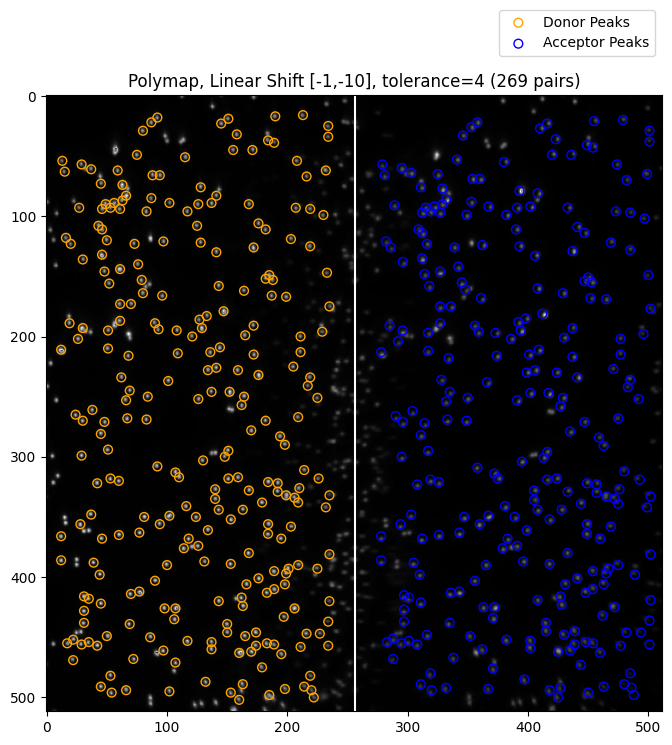

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")
plt.title(f"Polymap, Linear Shift [-1,-10], tolerance=4 ({len(poly_pair_CH1)} pairs)")
plt.scatter(poly_pair_CH1[:, 1], poly_pair_CH1[:, 0], s=40, facecolors='none', edgecolors='orange', label='Donor Peaks')
plt.scatter(poly_pair_CH2[:, 1], poly_pair_CH2[:, 0], s=40, facecolors='none', edgecolors='b', label='Acceptor Peaks')
plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

plt.show()

# 1.5. Displaying Time-Series

Image Size: 512 x 512


/Users/mac/Desktop/smPy-UserGuide/User Guide - Two Colour/../smpy.py:275: RuntimeWarning: invalid value encountered in divide
  FRET_arr = I_A/(I_D + I_A)


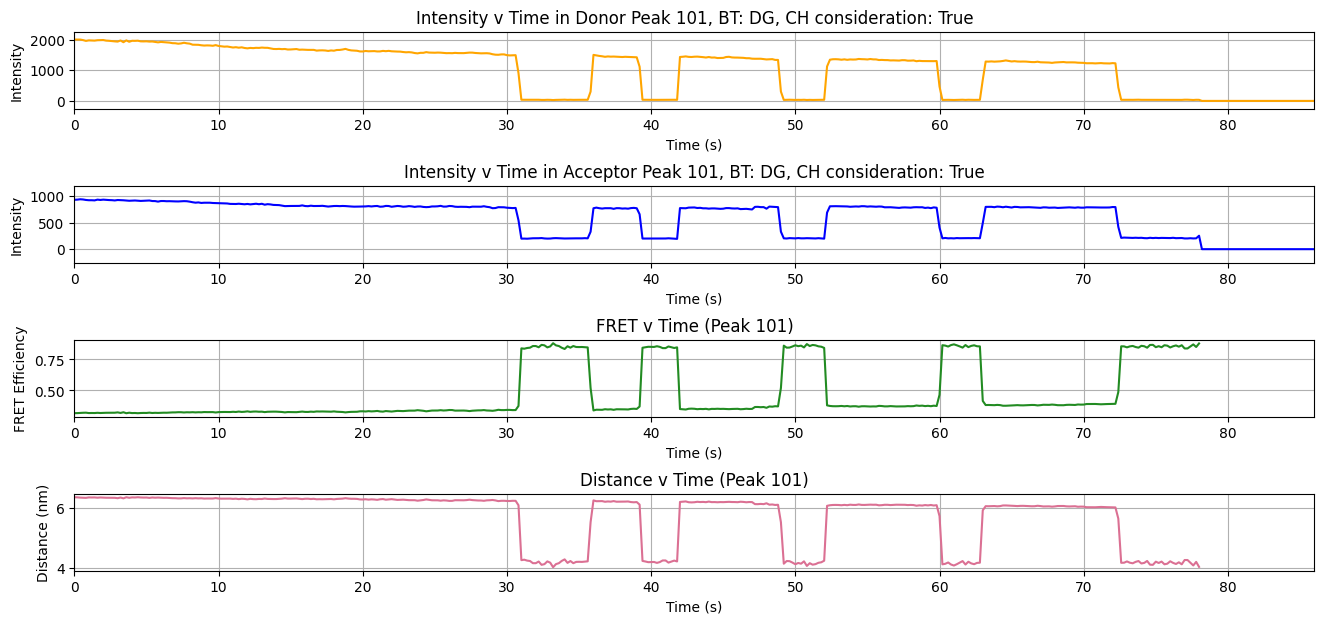

In [11]:
y_centres = np.concatenate((poly_pair_CH1[:,0], poly_pair_CH2[:,0]))
x_centres = np.concatenate((poly_pair_CH1[:,1], poly_pair_CH2[:,1]))
circle_array_new = draw_circle(4, y_centres, x_centres, image.shape[0])


mask = (circle_array_new == [255, 255, 0]).all(axis=-1)
if image.ndim == 2:
    image_copy = image.copy()
    image_copy = np.repeat(image[..., np.newaxis], 3, -1)
elif image.ndim==3 and image.shape[2]==3:
    image_copy = image.copy()

image_copy[mask] = [255, 255, 0]

display_time_series(file_path, image_copy, 101, poly_pair_CH1, poly_pair_CH2, tpf = 1/5, R_0=5.6, radius=4, time_interval=10, background_treatment = "DG", CH_consideration=True,  CH1_intensity_interval=1000, CH2_intensity_interval=500, figsize=(16,7))


# Extra: Assessing Background Subtraction Effects

Image Size: 512 x 512
Image Size: 512 x 512
Image Size: 512 x 512


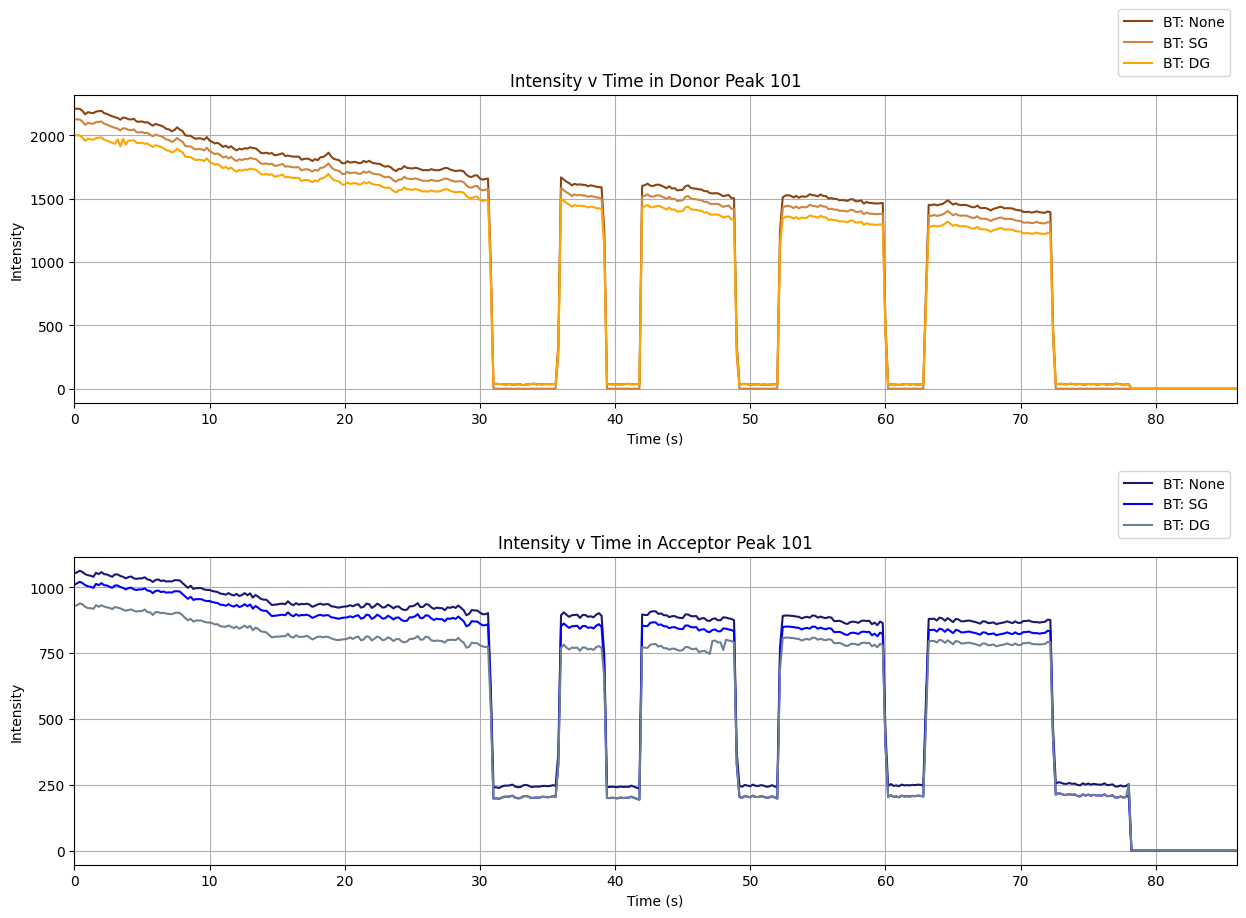

In [13]:
peak_idx = 101
tpf = 1/5 

radius=4
time_interval=10
CH1_intensity_interval=500
CH2_intensity_interval=250
figsize=(15, 10)

y_CH1, x_CH1 = poly_pair_CH1[peak_idx]
y_CH2, x_CH2 = poly_pair_CH2[peak_idx]
None_tot_intensity_all_frames_CH1 = []
None_tot_intensity_all_frames_CH2 = []
SG_tot_intensity_all_frames_CH1 = []
SG_tot_intensity_all_frames_CH2 = []
DG_tot_intensity_all_frames_CH1 = []
DG_tot_intensity_all_frames_CH2 = []


None_Frames_data = read_pma(file_path)
SG_Frames_data = SG_background_subtraction(file_path, image, radius, y_centres, x_centres, CH_consideration=True)
DG_Frames_data = DG_background_subtraction(file_path, radius, y_centres, x_centres, CH_consideration=True)

circle_array_new = draw_circle(4, y_centres, x_centres, image.shape[0])
mask = (circle_array_new == [255, 255, 0]).all(axis=-1)


for i in range(len(None_Frames_data)): 
    if None_Frames_data[i].ndim == 2:
        None_frame_3d = np.repeat(None_Frames_data[i][..., np.newaxis], 3, -1)
    elif None_Frames_data[i].ndim==3 and None_Frames_data[i].shape[2]==3:
        None_frame_3d = None_Frames_data[i]
    None_frame_3d[mask] = [255, 255, 0]

    None_total_intensity_CH1,_ = intensity_in_circle(None_frame_3d, radius, y_CH1, x_CH1)
    None_total_intensity_CH2,_ = intensity_in_circle(None_frame_3d, radius, y_CH2, x_CH2)
    None_tot_intensity_all_frames_CH1.append(None_total_intensity_CH1)
    None_tot_intensity_all_frames_CH2.append(None_total_intensity_CH2)

for i in range(len(SG_Frames_data)):
    if SG_Frames_data[i].ndim == 2:
        SG_frame_3d = np.repeat(SG_Frames_data[i][..., np.newaxis], 3, -1)
    elif SG_Frames_data[i].ndim==3 and SG_Frames_data[i].shape[2]==3:
        SG_frame_3d = SG_Frames_data[i]
    SG_frame_3d[mask] = [255, 255, 0]
    SG_total_intensity_CH1,_ = intensity_in_circle(SG_frame_3d, radius, y_CH1, x_CH1)
    SG_total_intensity_CH2,_ = intensity_in_circle(SG_frame_3d, radius, y_CH2, x_CH2)
    SG_tot_intensity_all_frames_CH1.append(SG_total_intensity_CH1)
    SG_tot_intensity_all_frames_CH2.append(SG_total_intensity_CH2)

for i in range(len(DG_Frames_data)):
    if DG_Frames_data[i].ndim == 2:
        DG_frame_3d = np.repeat(DG_Frames_data[i][..., np.newaxis], 3, -1)
    elif DG_Frames_data[i].ndim==3 and DG_Frames_data[i].shape[2]==3:
        DG_frame_3d = DG_Frames_data[i]
    DG_frame_3d[mask] = [255, 255, 0]
    DG_total_intensity_CH1,_ = intensity_in_circle(DG_frame_3d, radius, y_CH1, x_CH1)
    DG_total_intensity_CH2,_ = intensity_in_circle(DG_frame_3d, radius, y_CH2, x_CH2)
    DG_tot_intensity_all_frames_CH1.append(DG_total_intensity_CH1)
    DG_tot_intensity_all_frames_CH2.append(DG_total_intensity_CH2)

time = np.linspace(0, (len(None_tot_intensity_all_frames_CH1)-1)*tpf, len(None_tot_intensity_all_frames_CH1))
fig, ax = plt.subplots(2, 1, figsize=figsize)
fig.subplots_adjust(hspace=1)
ax[0].plot(time, None_tot_intensity_all_frames_CH1, color='saddlebrown', label='BT: None')
ax[0].plot(time, SG_tot_intensity_all_frames_CH1, color='peru', label='BT: SG')
ax[0].plot(time, DG_tot_intensity_all_frames_CH1, color='orange', label='BT: DG')
ax[0].set_title(f'Intensity v Time in Donor Peak {peak_idx}')
ax[0].set_ylabel('Intensity')
ax[0].set_xlabel('Time (s)')
ax[0].set_xlim(0, time[-1])
ax[0].grid()
ax[0].xaxis.set_major_locator(MultipleLocator(time_interval))
ax[0].yaxis.set_major_locator(MultipleLocator(CH1_intensity_interval))
ax[0].legend(loc='upper right', bbox_to_anchor=(1, 1.3))

fig.subplots_adjust(hspace=0.5)



ax[1].plot(time, None_tot_intensity_all_frames_CH2, color='midnightblue', label='BT: None')
ax[1].plot(time, SG_tot_intensity_all_frames_CH2, color='blue', label='BT: SG')
ax[1].plot(time, DG_tot_intensity_all_frames_CH2, color='slategrey', label='BT: DG')
ax[1].set_title(f'Intensity v Time in Acceptor Peak {peak_idx}')
ax[1].set_ylabel('Intensity')
ax[1].set_xlabel('Time (s)')
ax[1].grid()
ax[1].set_xlim(0, time[-1])
ax[1].xaxis.set_major_locator(MultipleLocator(time_interval))
ax[1].yaxis.set_major_locator(MultipleLocator(CH2_intensity_interval))
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1.3))

plt.show()